Import important libraries

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

Loading Dataset and printing first few rows:

In [3]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Checking data set structure and null values:


In [4]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


Filling The Missing values with mode,median etc:

In [11]:
df['education']=df['education'].fillna(df['education'].mode()[0])
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median()).astype(int)
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol']=df['totChol'].fillna(df['totChol'].median()).astype(int)
df['BMI']=df['BMI'].fillna(df['BMI'].median()).astype(int)
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median()).astype(int)
df['glucose']=df['glucose'].fillna(df['glucose'].median()).astype(int)
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


Checking Duplicates:

In [12]:
df.duplicated().sum()

np.int64(0)

Features selection and Label assigning:

In [14]:
X=df[['age','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','cigsPerDay','diabetes','diaBP','totChol','BMI','sysBP','heartRate','glucose']]
y=df['TenYearCHD']

Data splitting into training and testing:

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

Model Selection and Training:

In [36]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Checking by unseen data:

In [37]:
y_predict=model1.predict(X_test)


Model Evaluation:

In [39]:
print('Accuracy:',accuracy_score(y_test,y_predict))
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict))

Accuracy: 0.8462264150943396
Confusion Matrix
 [[892   1]
 [162   5]]


Diagram:

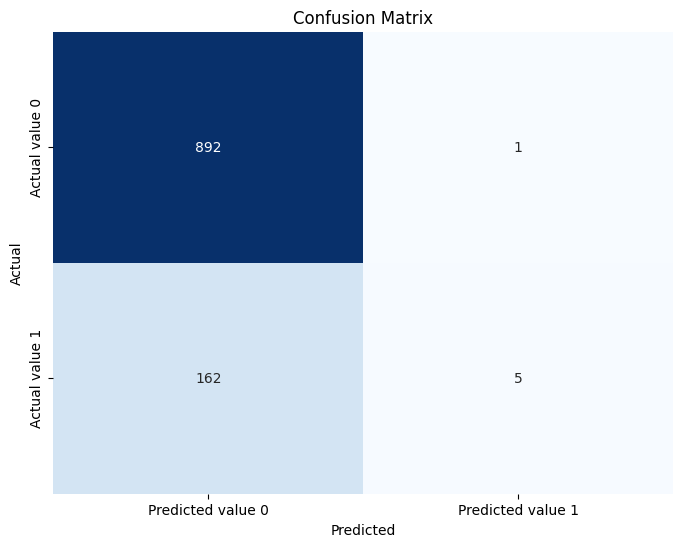

In [60]:
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Predicted value 0','Predicted value 1'],
            yticklabels=['Actual value 0','Actual value 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()